# A Brief Introduction to One-Hot Encoding

Adapted from https://www.datacamp.com/community/tutorials/categorical-data

Original data from https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv

Many machine learning algorithms are not capable of handling categorical features. One-hot encoding is a method to  transform categorical data to work bettter with these algorithms. 

![alt text](images/onehot.png "Cross Validation")

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import copy

In [2]:
flights = pd.read_csv('flights_short.csv')
flights.shape

(500, 16)

In [3]:
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
year         500 non-null int64
month        500 non-null int64
day          500 non-null int64
dep_time     489 non-null float64
dep_delay    489 non-null float64
arr_time     488 non-null float64
arr_delay    486 non-null float64
carrier      500 non-null object
tailnum      497 non-null object
flight       500 non-null int64
origin       500 non-null object
dest         500 non-null object
air_time     486 non-null float64
distance     500 non-null int64
hour         489 non-null float64
minute       489 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 62.6+ KB


Select only columns with categorical features

In [5]:
cat_flights =flights.select_dtypes(include=['object']).copy()

In [6]:
cat_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [7]:
cat_flights.isnull().sum()

carrier    0
tailnum    3
origin     0
dest       0
dtype: int64

Imputation with the most frequent tailnum value

In [8]:
cat_flights['tailnum'].value_counts()

N229SW    7
N295SW    6
N219AG    4
N925SW    3
N622AS    3
N409AS    3
N320AS    3
N508AS    3
N218AG    3
N306AS    3
N433AS    3
N558AS    3
N644AS    3
N627AS    3
N611AS    3
N223AG    3
N217AG    3
N756AS    3
N796AS    3
N237SW    3
N607AS    3
N788AS    3
N523VA    3
N703AS    3
N548AS    2
N551AS    2
N562AS    2
N531AS    2
N918SW    2
N556AS    2
         ..
N319AS    1
N953SW    1
N560AS    1
N3DPAA    1
N211FR    1
N274WN    1
N393DA    1
N713AS    1
N72405    1
N335NB    1
N4XMAA    1
N813UA    1
N75410    1
N37408    1
N963DN    1
N565AA    1
N573UA    1
N309AS    1
N447WN    1
N8317M    1
N471CA    1
N574UA    1
N626AW    1
N27239    1
N949DN    1
N397DA    1
N498UA    1
N383HA    1
N3AMAA    1
N806DN    1
Name: tailnum, Length: 374, dtype: int64

In [9]:
cat_flights = cat_flights.fillna(cat_flights['tailnum'].value_counts().index[0])

In [10]:
cat_flights.isnull().sum()

carrier    0
tailnum    0
origin     0
dest       0
dtype: int64

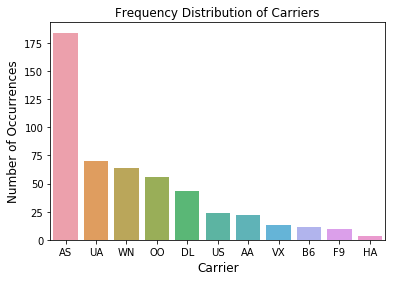

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_flights['carrier'].value_counts()
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

Make a copy of the orginal dataframe (with only categorical features)

In [12]:
cat_flights_onehot = cat_flights.copy()

In [13]:
cat_flights_onehot.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [14]:
cat_flights_onehot = pd.get_dummies(cat_flights_onehot, columns=['carrier'], prefix = ['carrier_1hot'])

In [15]:
cat_flights_onehot.head()

,tailnum,origin,dest,carrier_1hot_AA,carrier_1hot_AS,carrier_1hot_B6,carrier_1hot_DL,carrier_1hot_F9,carrier_1hot_HA,carrier_1hot_OO,carrier_1hot_UA,carrier_1hot_US,carrier_1hot_VX,carrier_1hot_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


Try another approach for one-hot encoding

In [16]:
# Create a new copy
cat_flights_onehot = cat_flights.copy()

In [17]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_flights_onehot['carrier'])
print(lb_results)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


LabelBinarizer's fit_transform returns a numpy array. So construct a pandas dataframe.

In [19]:
result_df = pd.concat([cat_flights_onehot, pd.DataFrame(lb_results, columns=lb.classes_)], axis=1)
result_df.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0
